In [18]:
import os
import numpy as np
import mne

In [19]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample', 'sample_audvis_filt-0-40_raw.fif')

100%|█████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 1.67TB/s]
Untarring contents of '/Users/hsj/mne_data/MNE-sample-data-processed.tar.gz' to '/Users/hsj/mne_data'


Download complete in 03m05s (1576.2 MB)


In [20]:
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw = raw.pick_types(meg=False, eeg=True, eog=False, exclude='bads')

Opening raw data file /Users/hsj/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


In [21]:
print(raw.info)

<Info | 14 non-empty values
 bads: []
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 59 EEG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 59
 projs: Average EEG reference: off
 sfreq: 150.2 Hz
>


In [22]:
raw.crop(tmin=0, tmax=60) 

Reading 0 ... 9009  =      0.000 ...    59.999 secs...


<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 9010 (60.0 s), ~7.0 MB, data loaded>

Using matplotlib as 2D backend.


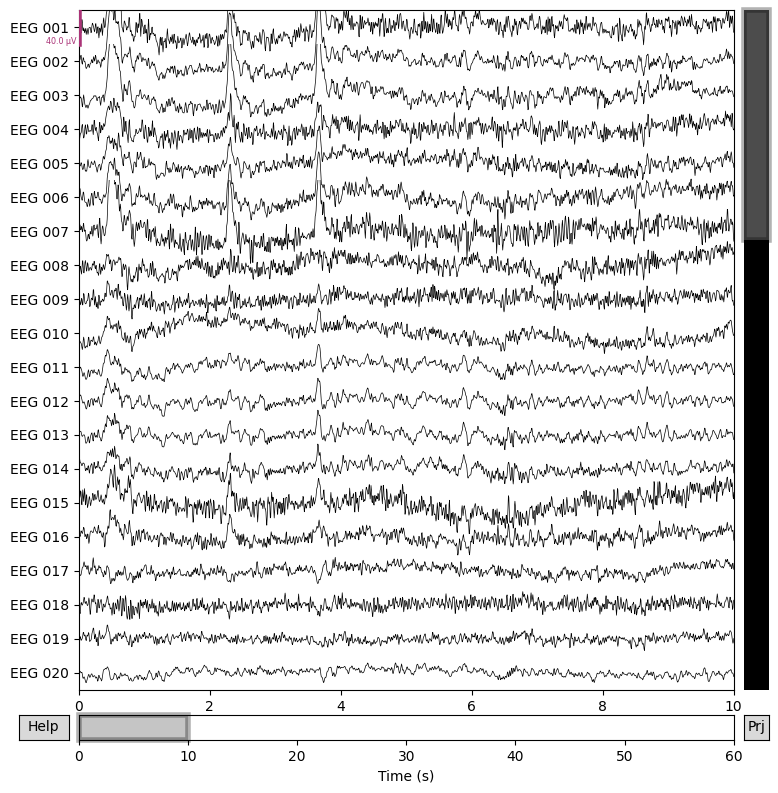

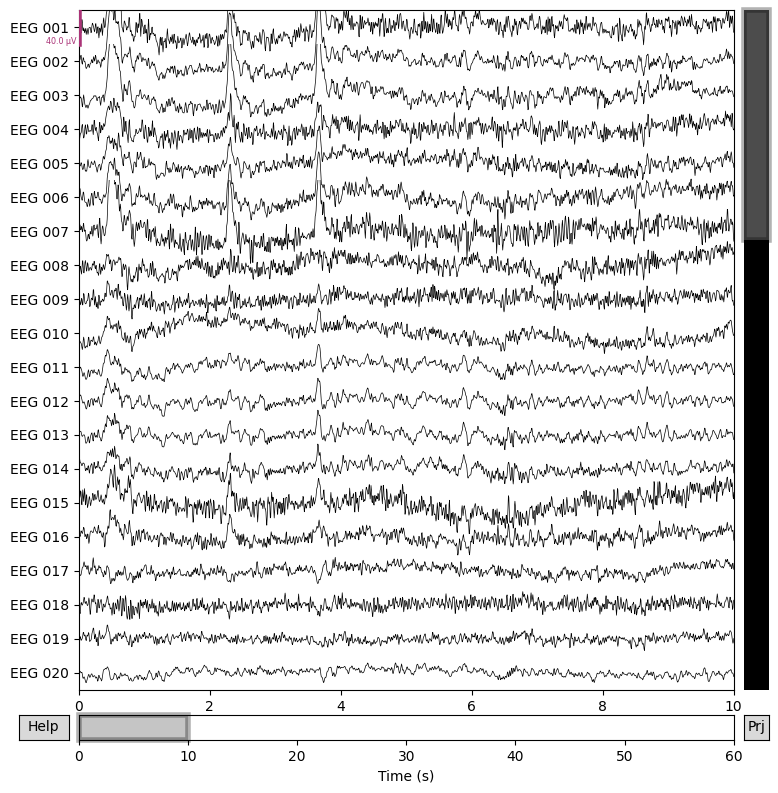

In [23]:
raw.plot()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 13.639 (s)


/Users/hsj/miniconda3/envs/eeg/lib/python3.8/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


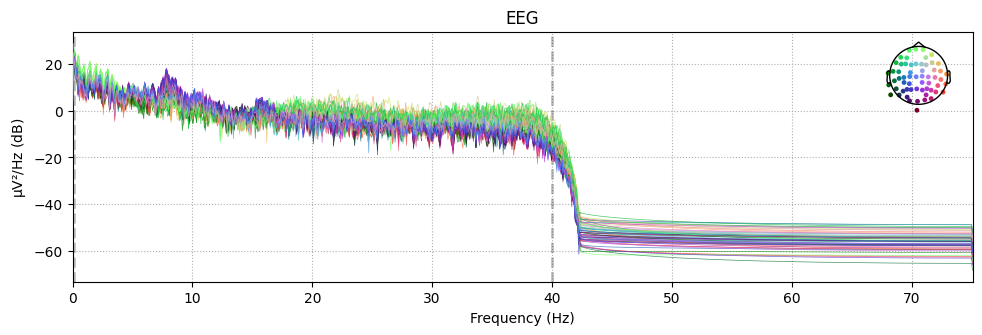

In [29]:
raw.plot_psd()

In [30]:
raw.resample(600) #resamples to a rate of 600 Hz

<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 36003 (60.0 s), ~19.1 MB, data loaded>

In [31]:
raw.filter(1., None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1981 samples (3.302 s)



<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 36003 (60.0 s), ~19.1 MB, data loaded>

In [32]:
raw.filter(None, 50.)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 159 samples (0.265 s)



<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 36003 (60.0 s), ~19.1 MB, data loaded>

In [34]:
raw.notch_filter(50)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3961 samples (6.602 s)



<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 36003 (60.0 s), ~19.1 MB, data loaded>

In [36]:
raw.notch_filter(np.arange(60, 241, 60)) 

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3961 samples (6.602 s)



<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 36003 (60.0 s), ~19.1 MB, data loaded>

In [37]:
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample', 'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False)

In [42]:
events1 = mne.find_events(raw)

320 events found
Event IDs: [ 1  2  3  4  5 32]


In [44]:
events = mne.make_fixed_length_events(raw, start=0, stop=10, duration=1.)

In [43]:
epochs = mne.Epochs(raw, events, preload=True).pick_types(eeg=True)

Not setting metadata
10 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Loading data for 10 events and 421 original time points ...
1 bad epochs dropped
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


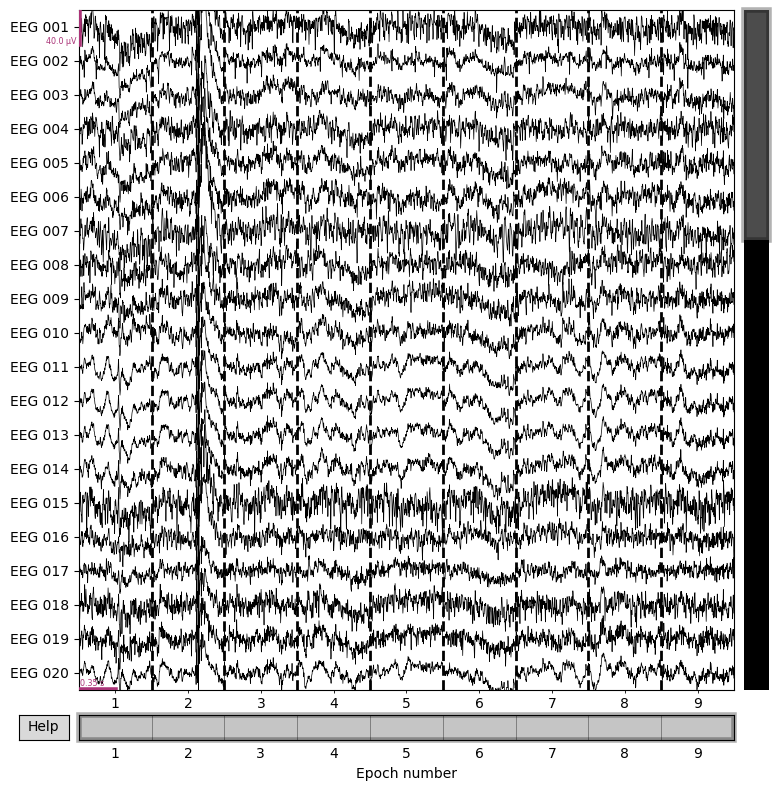

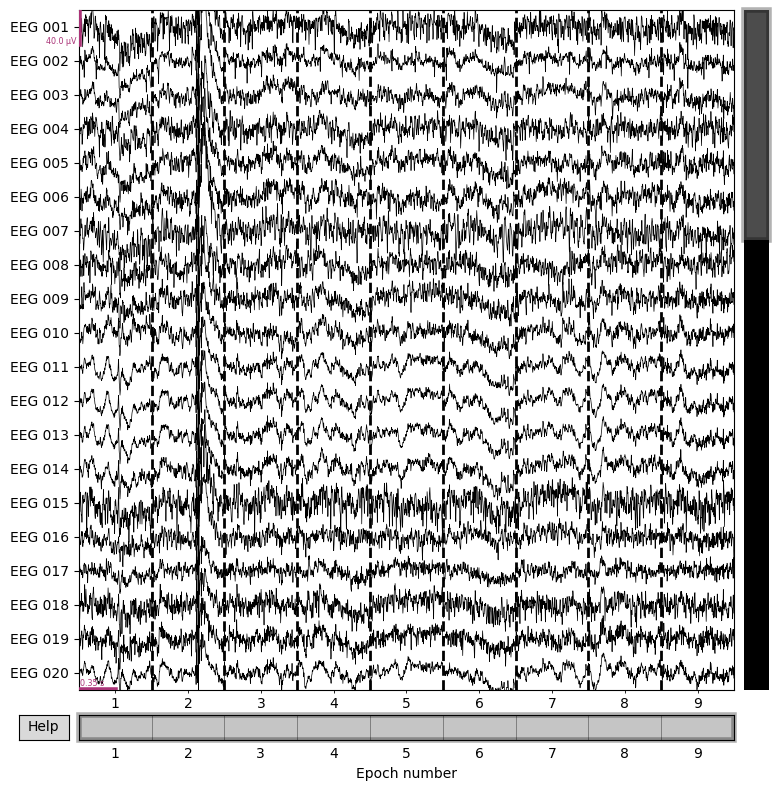

In [51]:
epochs['1'].plot()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


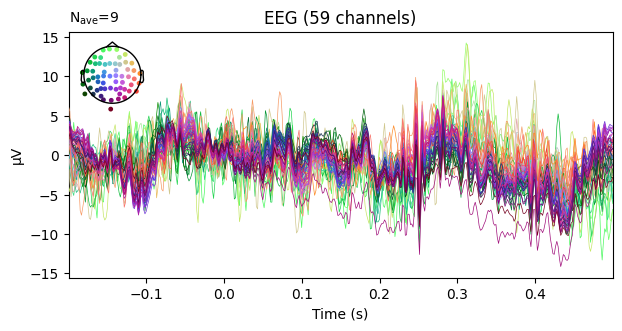

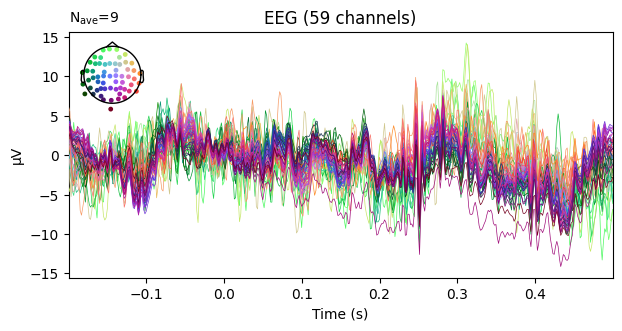

In [54]:
epochs.average().plot()